In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
# import plotly.express as px


In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [4]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [5]:
df['Date'].value_counts()

2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
 df['Hour'] = (df['Time']).dt.hour

In [12]:
df['Day'] = df['Date'].dt.strftime("%A")

In [13]:
date = df['Date']
date = date.dt.strftime("%A")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [15]:
df['Day']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day, Length: 1000, dtype: object

## Analisis Pelanggan

Pembeli laki-laki lebih besar dari perempuan di tiap kota?

Text(0.5, 1.0, 'Gender by City')

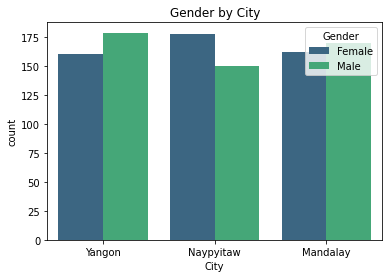

In [16]:
sns.countplot(x="City", hue = "Gender", data =df, palette='viridis').set_title("Gender by City") 

Apakah jumlah pembelian Customer type Member lebih besar dari Customer type Normal, berdasarkan tiap kota?

Text(0.5, 1.0, 'Customer Type by City')

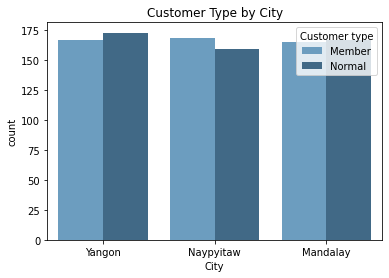

In [17]:
sns.countplot(x="City", hue = "Customer type", data =df, palette='Blues_d').set_title("Customer Type by City") 

Apakah pembayaran menggunakan cash lebih besar dari Ewallet dan Credit Card, berdasarkan tiap kota?

Text(0.5, 1.0, 'Payment Type by City')

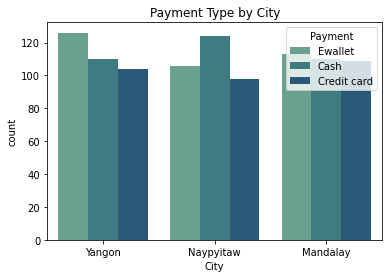

In [18]:
sns.countplot(x="City", hue = "Payment", data =df, palette='crest').set_title("Payment Type by City") 

In [19]:
# ax = pd.pivot_table(df, values='Total', index='City', columns='Customer type', aggfunc='sum').plot(kind='bar', figsize=(10,6))
# ax.set_ylabel('Net income');
# ax.set_title('Net income generated by branch per gender across all product lines. Period of 3 months');

# Analisis Produk

Produk Food and Beverages memiliki gross income lebih besar dari produk lainnya dari tiap kota?

<AxesSubplot:xlabel='gross income', ylabel='Product line'>

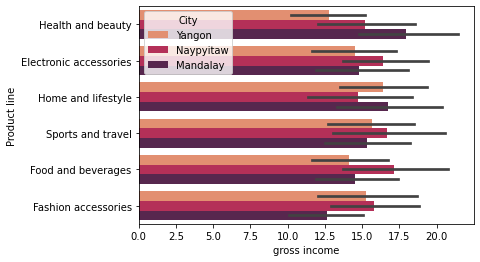

In [20]:
sns.barplot(y = 'Product line', x = 'gross income', hue = 'City', data=df, palette='rocket_r' )

Apakah Yangon memiliki gross income terbesar dari kota lainnya?

<AxesSubplot:xlabel='City', ylabel='gross income'>

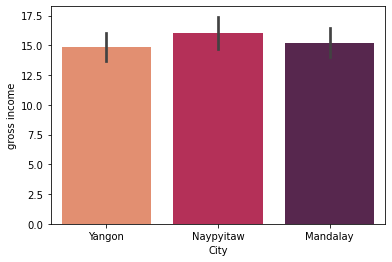

In [21]:
sns.barplot(y = 'gross income', x = 'City', data=df, palette='rocket_r' )

Apakah Food and Beverages memiliki rating lebih besar dari produk lainnya?

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

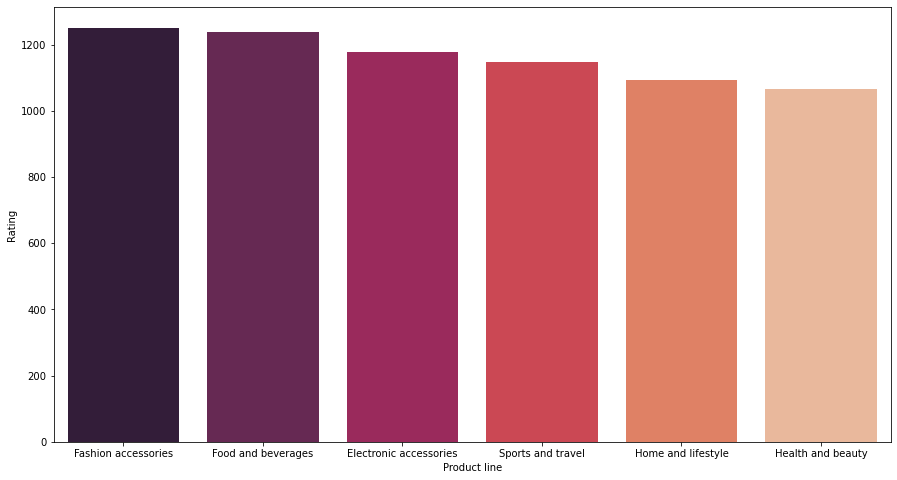

In [34]:
p_r =df[["Product line", "Rating"]].groupby(['Product line'], as_index=False).sum().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(15,8))

sns.barplot(x='Product line', y='Rating', data=p_r, palette='rocket')

## Sales

Apakah Jam setelah kerja memiliki penjualan tertinggi dari jam lainnya?

Text(0.5, 1.0, 'Product Sales per Hour')

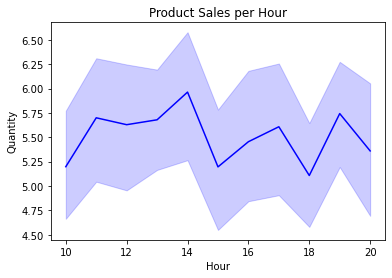

In [40]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df, color='Blue').set_title("Product Sales per Hour")

In [24]:
date = df['Date']
date = date.dt.strftime("%A")
date

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

Apakah Hari Minggu adalah hari terbanyak Orang berbelanja?

Text(0.5, 1.0, 'Product Sales per Day')

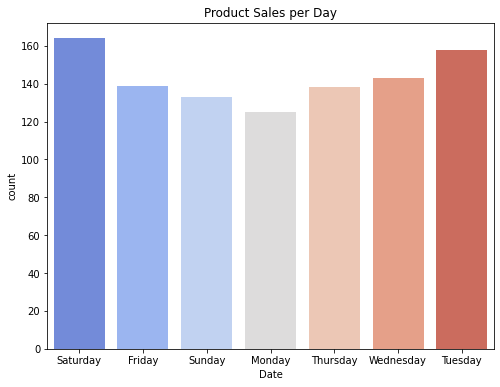

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x=date ,data =df, palette='coolwarm').set_title("Product Sales per Day")

In [26]:
date


0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

## Save Dataframe to file CSV

In [27]:
df.to_csv('milestone1 visualization.csv')


In [28]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [29]:
nay = df[(df['City'] == 'Naypyitaw')]
naypyitaw = nay['gross income']

yangon = df[(df['City'] == 'Yangon')]
yangons = yangon['gross income']

man = df[(df['City'] == 'Mandalay')]
mandalay = man['gross income']

In [30]:
naypyitaw = naypyitaw.values
yangons = yangons.values
mandalay = mandalay.values


log_naypyitaw = np.log(naypyitaw)
log_yangons = np.log(yangons)
log_mandalay = np.log(mandalay)


In [31]:
pairs = [('naypyitaw', 'mandalay'), 
         ('mandalay', 'yangons'), 
         ('naypyitaw', 'yangons')]

In [ ]:


import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))



matplotlib: 3.5.1
